In [1]:
import os
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse, r2_score

os.chdir("..")

In [2]:
LAMBDA_STR = "\u03BB"
ALPHA_STR = "\u03B1"
BETA_STR = "\u03B2"

Load simulation

In [213]:
N_beta_map = pd.read_csv("data/N_beta_mapping.csv")
alpha_lambda_map = pd.read_csv("data/alpha_lambda_mapping.csv")

In [111]:
data = {}
path = os.path.join("data","ma_ridge_regression","df_N_beta")
fnames = [os.path.join(path, f) for f in os.listdir(path)]
for i, name in enumerate(fnames):
    # infer key from fname
    N, beta_ind = [int(p) for p in name.split("\\")[-1].split('.')[0].split("_")]
    if (i+1)%500==0:
        print(i+1)
    data[(N,beta_ind)] = pd.read_pickle(name)

500
1000
1500
2000
2500


Analysis Functions

In [206]:
def df_best(df):
    df_best = pd.concat(
        [df.loc[df['r2'] == df['r2'].max()],
         df.loc[df['train_mse'] == df['train_mse'].min()],
         df.loc[df['test_mse'] == df['test_mse'].min()]])
    df_best.index = ['best_r2', 'best_train_mse', 'best_test_mse']
    return df_best

def best_alpha_of_lambda(df, lam, ret_df=False, metric=None):
    df_lam = df_reg.loc[df_reg['lambda']==lam]
    ret_val = df_best(df_lam)
    if metric:
        ret_val = ret_val.loc[f'best_{metric}']
    if not ret_df:
        ret_val = ret_val['alpha']
    return ret_val

def heatmap(df, metric, show=True, filename=None):
    df_to_plot = df.copy()
    df_to_plot['alpha'] = df_to_plot['alpha'].round(2)
    df_to_plot["lambda"] = df_to_plot["lambda"].round(2)
    sns.heatmap(df_to_plot.pivot(index="alpha", columns="lambda", values=metric), cmap="viridis")
    plt.title(metric)
    lam = np.where(np.isclose(df['lambda'].unique(),df_best(df).loc[f'best_{metric}','lambda']))[0][0]
    alpha = np.where(np.isclose(df['alpha'].unique(),df_best(df).loc[f'best_{metric}','alpha']))[0][0]
    
    plt.scatter(x=lam, y=alpha, s=20, marker="*", c='red')
    if filename:
        plt.savefig(f"data/heatmap/{filename}.png")
        plt.cla()
    if show:
        plt.show()

In [285]:
def fix_beta_plot_N_vs_alpha(beta_ind):
    BETA_IND = beta_ind
    BETA = N_beta_map.loc[BETA_IND, 'beta']
    df_to_plot = pd.DataFrame(columns=["N","alpha","lambda"], index=np.arange(50),dtype=float)
    for i in range(len(N_beta_map)):
        N = N_beta_map.loc[i,'N']
        df_reg = data[N,BETA_IND]
        alpha, lam = df_best(df_reg).loc["best_test_mse", ["alpha","lambda"]]

        df_to_plot.loc[i,'N'] = N
        df_to_plot.loc[i,'alpha'] = alpha
        df_to_plot.loc[i,'lambda'] = lam
    plt.figure(figsize=(13,5))
    sns.scatterplot(data=df_to_plot, x="N", y="alpha", hue="lambda")
    plt.title(f"{BETA_STR}={BETA.round(3)}")
    plt.show()

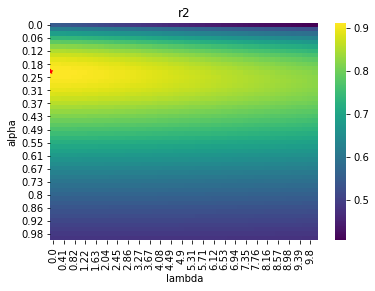

In [284]:
heatmap(df_reg, "r2")

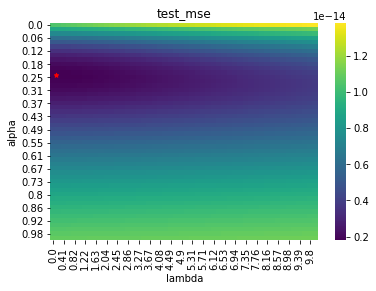

In [283]:
df_reg = data[5,5]
heatmap(df_reg, "test_mse")

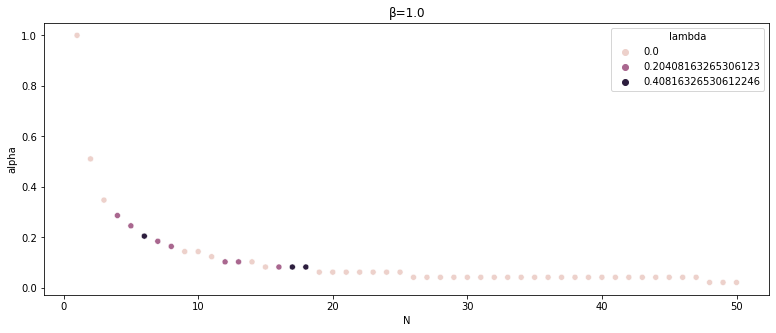

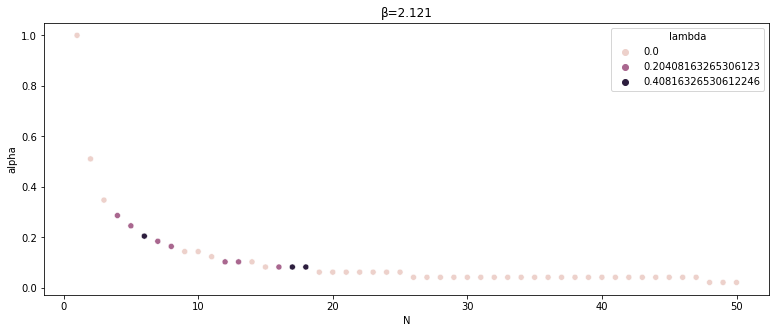

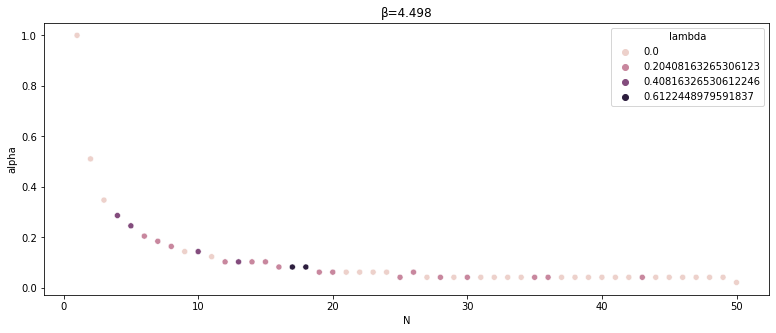

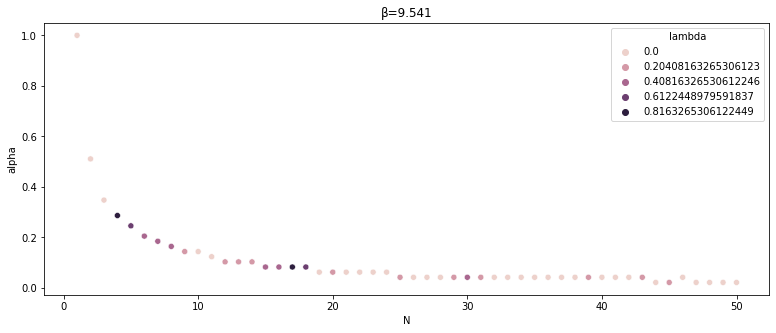

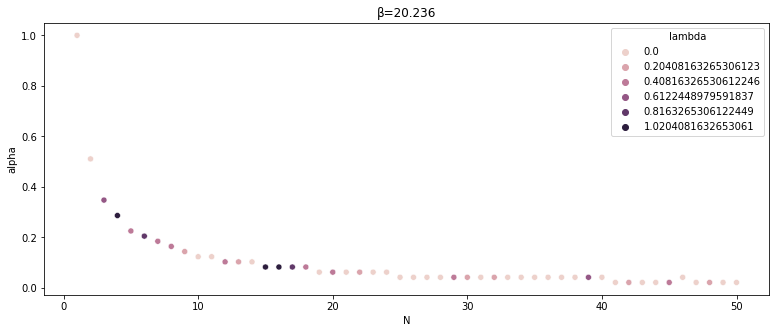

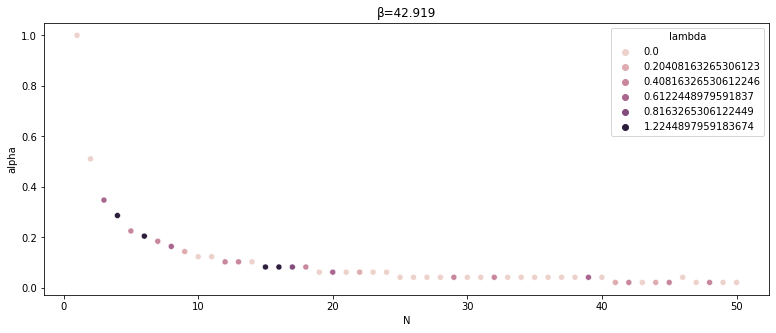

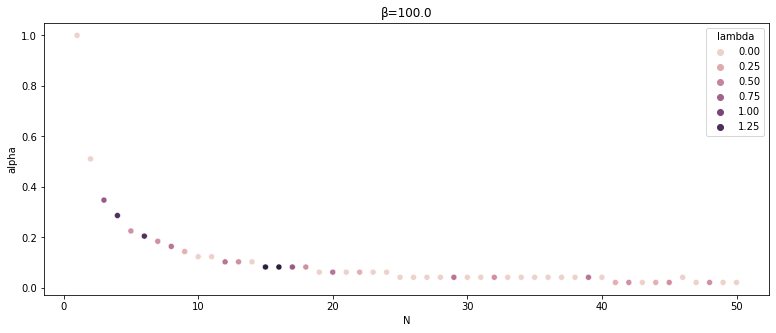

In [286]:
for i in np.linspace(0,49, num=7).astype(int):
    fix_beta_plot_N_vs_alpha(i)

In [310]:
df_reg_10 = data[25, 25]
df_reg_20 = data[25, 32]

beta=10


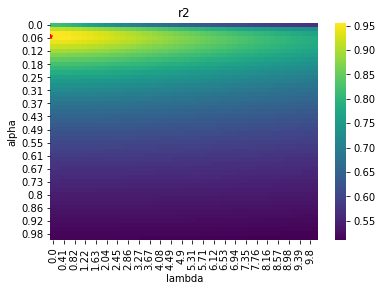

beta=20


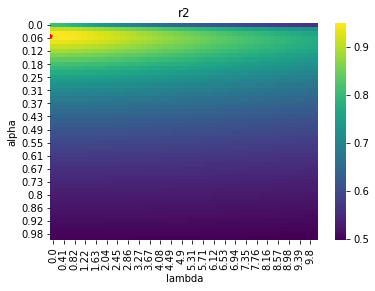

In [313]:
print("beta=10")
heatmap(df_reg_10, 'r2')
print("beta=20")
heatmap(df_reg_20, 'r2')

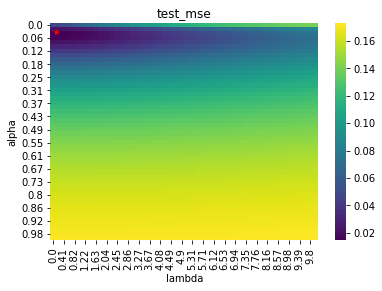

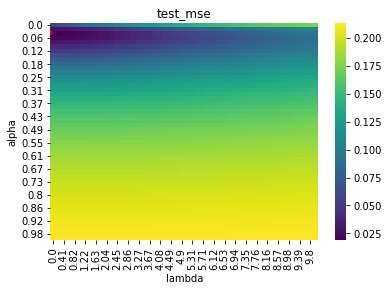

In [312]:
heatmap(df_reg_10, 'test_mse')
heatmap(df_reg_20, 'test_mse')

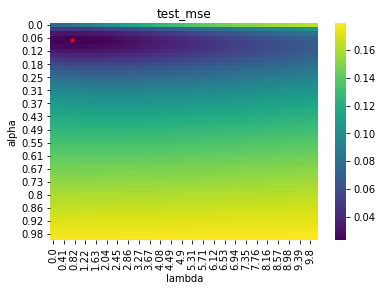

In [301]:
heatmap(df_reg, 'test_mse')

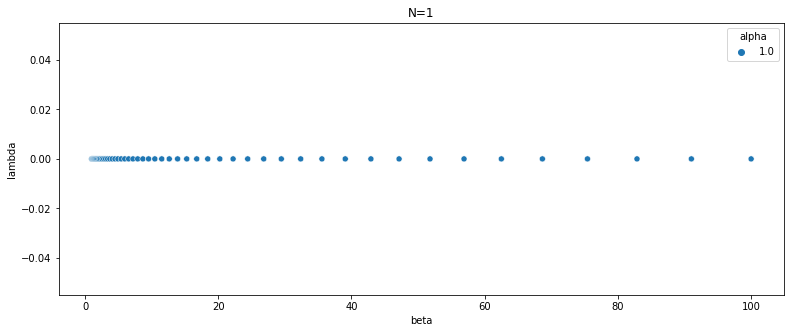

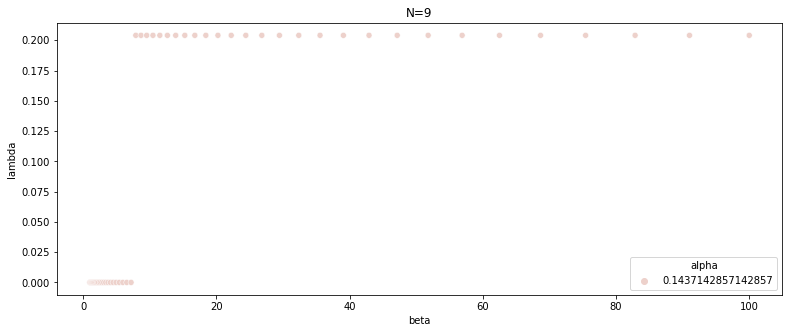

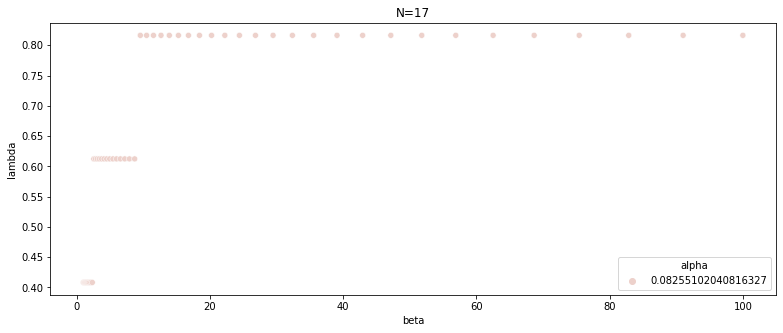

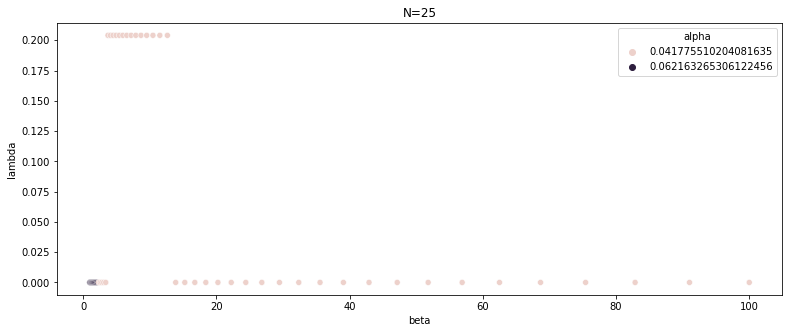

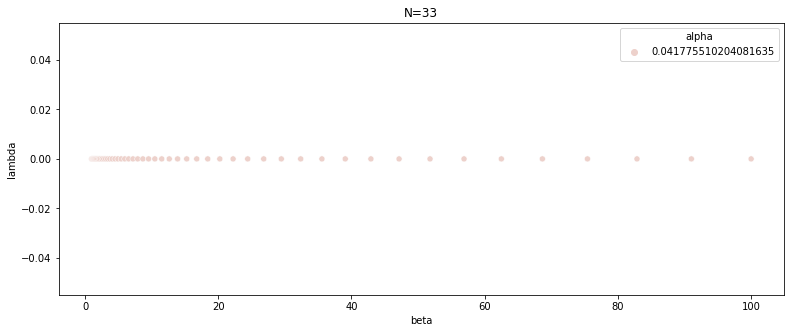

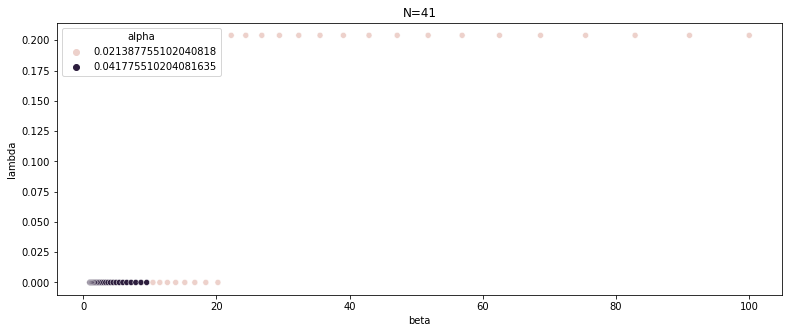

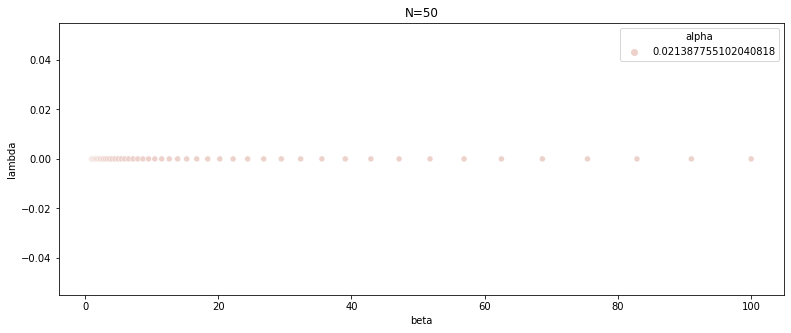

In [297]:
def fix_N_plot_beta_vs_lambda(N):
    df_to_plot = pd.DataFrame(columns=["beta","alpha","lambda"], index=np.arange(50),dtype=float)
    for beta_ind in range(len(N_beta_map)):
        BETA = N_beta_map.loc[beta_ind, 'beta']
        df_reg = data[N,beta_ind]
        alpha, lam = df_best(df_reg).loc["best_test_mse", ["alpha","lambda"]]

        df_to_plot.loc[beta_ind,'beta'] = BETA
        df_to_plot.loc[beta_ind,'alpha'] = alpha
        df_to_plot.loc[beta_ind,'lambda'] = lam
    plt.figure(figsize=(13,5))
    sns.scatterplot(data=df_to_plot, x="beta", y="lambda", hue="alpha", cmap='viridis')
    plt.title(f"N={N}")
    plt.show()

for n in np.linspace(1,50, num=7).astype(int):
    fix_N_plot_beta_vs_lambda(n)

In [332]:
alphas = df_reg.alpha.unique()
alphas

array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ])

In [349]:
alpha_n_map = pd.DataFrame([np.linspace(0.5,0.99),np.log(.5)/np.log(np.linspace(0.5,0.99))]).T
alpha_n_map.columns = ["1-alpha","estimated_N"]
alpha_n_map

,1-alpha,estimated_N
0,0.50,1.000000
1,0.51,1.029409
2,0.52,1.059977
3,0.53,1.091780
4,0.54,1.124899
5,0.55,1.159425
6,0.56,1.195455
7,0.57,1.233097
8,0.58,1.272467
9,0.59,1.313693


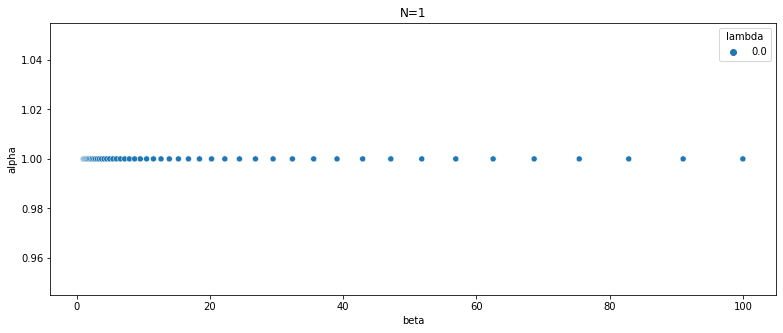

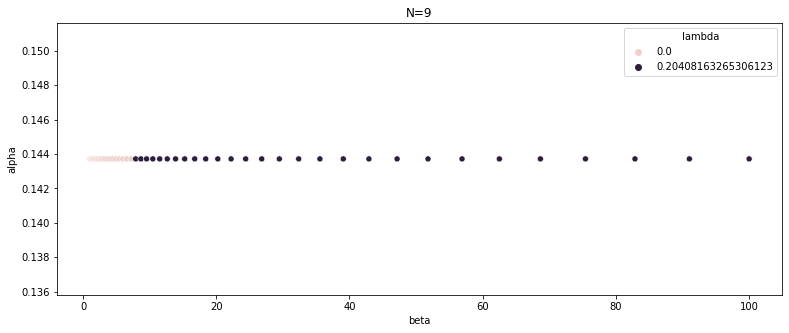

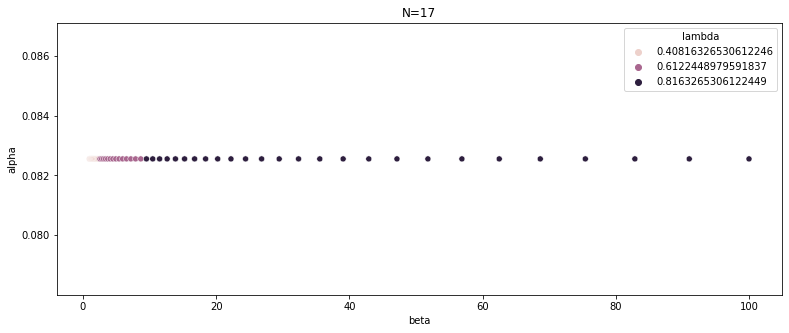

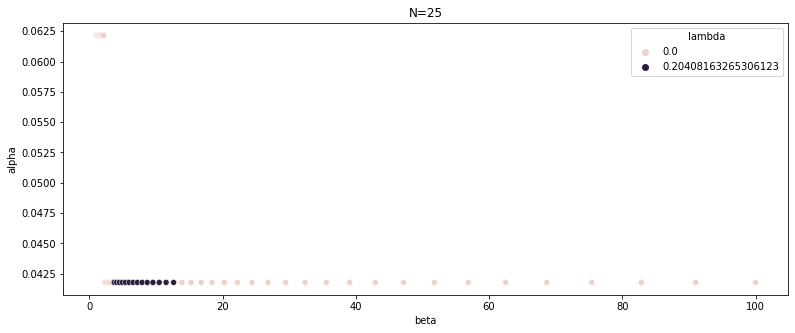

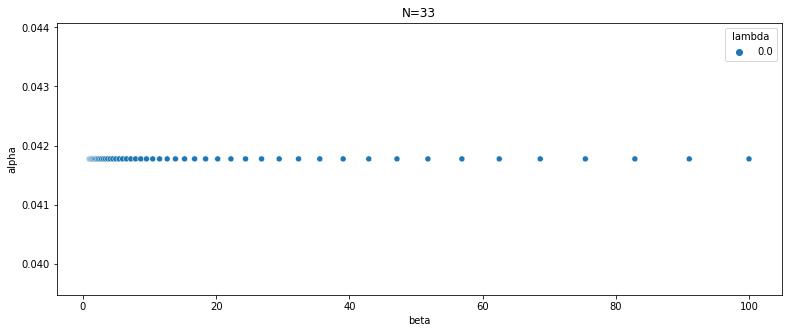

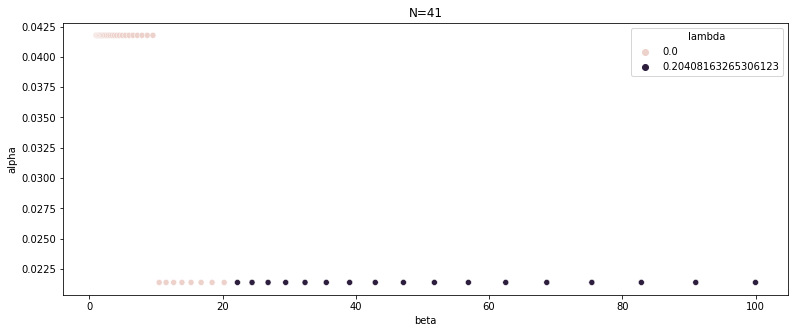

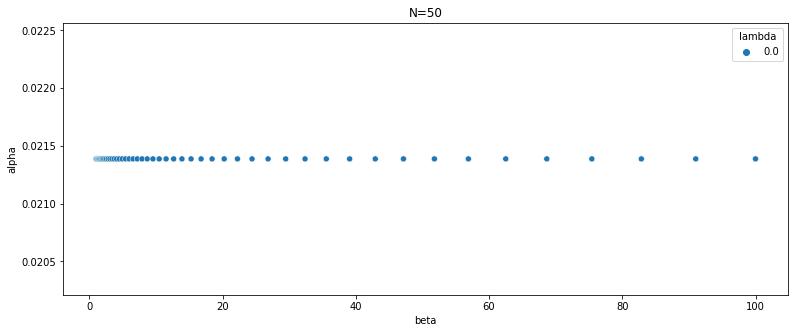

In [318]:
def fix_N_plot_beta_vs_alpha(N):
    df_to_plot = pd.DataFrame(columns=["beta","alpha","lambda"], index=np.arange(50),dtype=float)
    for beta_ind in range(len(N_beta_map)):
        BETA = N_beta_map.loc[beta_ind, 'beta']
        df_reg = data[N,beta_ind]
        alpha, lam = df_best(df_reg).loc["best_test_mse", ["alpha","lambda"]]

        df_to_plot.loc[beta_ind,'beta'] = BETA
        df_to_plot.loc[beta_ind,'alpha'] = alpha
        df_to_plot.loc[beta_ind,'lambda'] = lam
    plt.figure(figsize=(13,5))
    sns.scatterplot(data=df_to_plot, x="beta", y="alpha", hue="lambda", cmap='viridis')
    plt.title(f"N={N}")
    plt.show()

for n in np.linspace(1,50, num=7).astype(int):
    fix_N_plot_beta_vs_alpha(n)

In [316]:
df_reg = data[25,32]
fig = px.scatter(df_reg, x="lambda", y="test_mse", color="alpha", title="MSE vs lambda")
fig.show()

Text(0, 0.5, 'alpha')

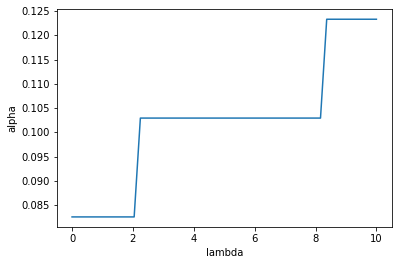

In [295]:
plt.plot(df_reg['lambda'].unique(), [best_alpha_of_lambda(df_reg, lam, False, 'test_mse') for lam in df_reg['lambda'].unique()])
plt.xlabel("lambda")
plt.ylabel("alpha")

In [177]:

best_alpha_of_lambda(df_reg, 0)

,alpha,lambda,r2,train_mse,test_mse,reg
best_r2,0.225265,0.0,0.868475,0.051326,0.04264,"Ridge(alpha=0.0, random_state=123)"
best_train_mse,0.225265,0.0,0.868475,0.051326,0.04264,"Ridge(alpha=0.0, random_state=123)"
best_test_mse,0.225265,0.0,0.868475,0.051326,0.04264,"Ridge(alpha=0.0, random_state=123)"


In [172]:
import plotly.express as px

fig = px.scatter(df_reg, x="alpha", y="r2", color="lambda", title="R2 vs Alpha")
fig.show()